In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

Data Clean Up
- Removing all the 999s thats indicate errors during collection

In [2]:
# data has already been cleaned and export to csv files omni_cleaned_data.csv and omni_cleaned_time.csv
# only uncomment if data needs to be cleaned again
# takes about 20 mins to run on my machine (Ryzen 9 7940HS, 64 GB RAM, etc.)

# %run cleanup.py

Import Cleaned Data

In [3]:
data = np.genfromtxt('./data/cleaned/omni_cleaned_data.csv', delimiter=',', dtype=float)
time = np.genfromtxt('./data/cleaned/omni_cleaned_time.csv', delimiter=',', dtype=dt.datetime)

bZ = data[:, 0] # magnetic field in the z-direction
fP = data[:, 1] # flow pressure
ssCount = data[:, 2] # sun spot count
dst = data[:, 3] # dst index

bZ[0]

2.4

In [4]:
# Remove some outliers in the data
avg_bZ = np.mean(bZ)
std_bZ = np.std(bZ)
timeBz = time[(bZ > avg_bZ - 3*std_bZ) & (bZ < avg_bZ + 3*std_bZ)]
bZ = bZ[(bZ > avg_bZ - 3*std_bZ) & (bZ < avg_bZ + 3*std_bZ)]
bZFrame = pd.DataFrame({'time': timeBz, 'bZ': bZ})

avg_fP = np.mean(fP)
std_fP = np.std(fP)
timeFp = time[(fP > avg_fP - 3*std_fP) & (fP < avg_fP + 3*std_fP)]
fP = fP[(fP > avg_fP - 3*std_fP) & (fP < avg_fP + 3*std_fP)]
fPFrame = pd.DataFrame({'time': timeFp, 'fP': fP})

avg_ssCount = np.mean(ssCount)
std_ssCount = np.std(ssCount)
timeSs = time[(ssCount > avg_ssCount - 3*std_ssCount) & (ssCount < avg_ssCount + 3*std_ssCount)]
ssCount = ssCount[(ssCount > avg_ssCount - 3*std_ssCount) & (ssCount < avg_ssCount + 3*std_ssCount)]
ssCountFrame = pd.DataFrame({'time': timeSs, 'ssCount': ssCount})

avg_dst = np.mean(dst)
std_dst = np.std(dst)
timeDst = time[(dst > avg_dst - 3*std_dst) & (dst < avg_dst + 3*std_dst)]
dst = dst[(dst > avg_dst - 3*std_dst) & (dst < avg_dst + 3*std_dst)]
dstFrame = pd.DataFrame({'time': timeDst, 'dst': dst})

# save the cleaned data to csv files
bZFrame.to_csv('./data/cleaned/bZ_cleaned.csv', index=False)
fPFrame.to_csv('./data/cleaned/fP_cleaned.csv', index=False)
ssCountFrame.to_csv('./data/cleaned/ssCount_cleaned.csv', index=False)
dstFrame.to_csv('./data/cleaned/dst_cleaned.csv', index=False)

Plot Data
- Plotting all data points once cleaned

In [5]:
# %run plot.py

Break Data in Solar Cycles

In [6]:
ssCycle21 = (dt.datetime(1976, 3, 1), dt.datetime(1979, 12, 1))
ssCycle22 = (dt.datetime(1986, 9, 1), dt.datetime(1989, 11, 1))
ssCycle23 = (dt.datetime(1996, 8, 1), dt.datetime(2001, 11, 1))
ssCycle24 = (dt.datetime(2008, 12, 1), dt.datetime(2014, 4, 1))
ssCycle25 = (dt.datetime(2019, 12, 1), dt.datetime(2024, 3, 1)) # ongoing

ssCycles = [ssCycle21, ssCycle22, ssCycle23, ssCycle24, ssCycle25]

# break the data into solar cycles
bZFrame['cycle'] = None
fPFrame['cycle'] = None
ssCountFrame['cycle'] = None
dstFrame['cycle'] = None

# convert all the time ranges to datetime
bZFrame['time'] = pd.to_datetime(bZFrame['time'], format="b'%Y-%m-%d %H:%M:%S'")
fPFrame['time'] = pd.to_datetime(fPFrame['time'], format="b'%Y-%m-%d %H:%M:%S'")
ssCountFrame['time'] = pd.to_datetime(ssCountFrame['time'], format="b'%Y-%m-%d %H:%M:%S'")
dstFrame['time'] = pd.to_datetime(dstFrame['time'], format="b'%Y-%m-%d %H:%M:%S'")

for i, cycle in enumerate(ssCycles):
    bZFrame.loc[(bZFrame['time'] >= cycle[0]) & (bZFrame['time'] <= cycle[1]), 'cycle'] = i + 21 # i is zero indexed so add 21
    fPFrame.loc[(fPFrame['time'] >= cycle[0]) & (fPFrame['time'] <= cycle[1]), 'cycle'] = i + 21
    ssCountFrame.loc[(ssCountFrame['time'] >= cycle[0]) & (ssCountFrame['time'] <= cycle[1]), 'cycle'] = i + 21
    dstFrame.loc[(dstFrame['time'] >= cycle[0]) & (dstFrame['time'] <= cycle[1]), 'cycle'] = i + 21

# remove the data that does not belong to any cycle
bZFrame = bZFrame.dropna()
fPFrame = fPFrame.dropna()
ssCountFrame = ssCountFrame.dropna()
dstFrame = dstFrame.dropna()

# save the data to csv files
bZFrame.to_csv('./data/cycles/bZ_cycles.csv', index=False)
fPFrame.to_csv('./data/cycles/fP_cycles.csv', index=False)
ssCountFrame.to_csv('./data/cycles/ssCount_cycles.csv', index=False)
dstFrame.to_csv('./data/cycles/dst_cycles.csv', index=False)

In [9]:
import regression as reg

bZ = bZFrame.to_numpy()
fP = fPFrame.to_numpy()
ssCount = ssCountFrame.to_numpy()
dst = dstFrame.to_numpy()

data = [bZ, fP, ssCount, dst]

times = np.array([])
idk = np.array([[], [], [], [], []])

# create array of all the times that are in all the data sets
for dat in data:
    times = np.append(times, dat[:, 0])

times = np.unique(times)
times = np.sort(times)

print(bZ.shape)

# create a new array of data that has all the data for each time
# fill in NaN for missing data
for i, time in enumerate(times):
    print(i, time)
    for b in bZ:
        if time in b[i, 0]:
            idk[0] = np.append(idk[0], b[0]) # append the time
            idk[1] = np.append(idk[1], b[1]) # append the bZ
            print(idk)
        else:
            idk = np.append(idk, np.nan)
            print(idk)
    
        

(155410, 3)
0 1976-03-01 00:30:00


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
np.savetxt('./data/testing/idk.csv', idk, delimiter=',') 

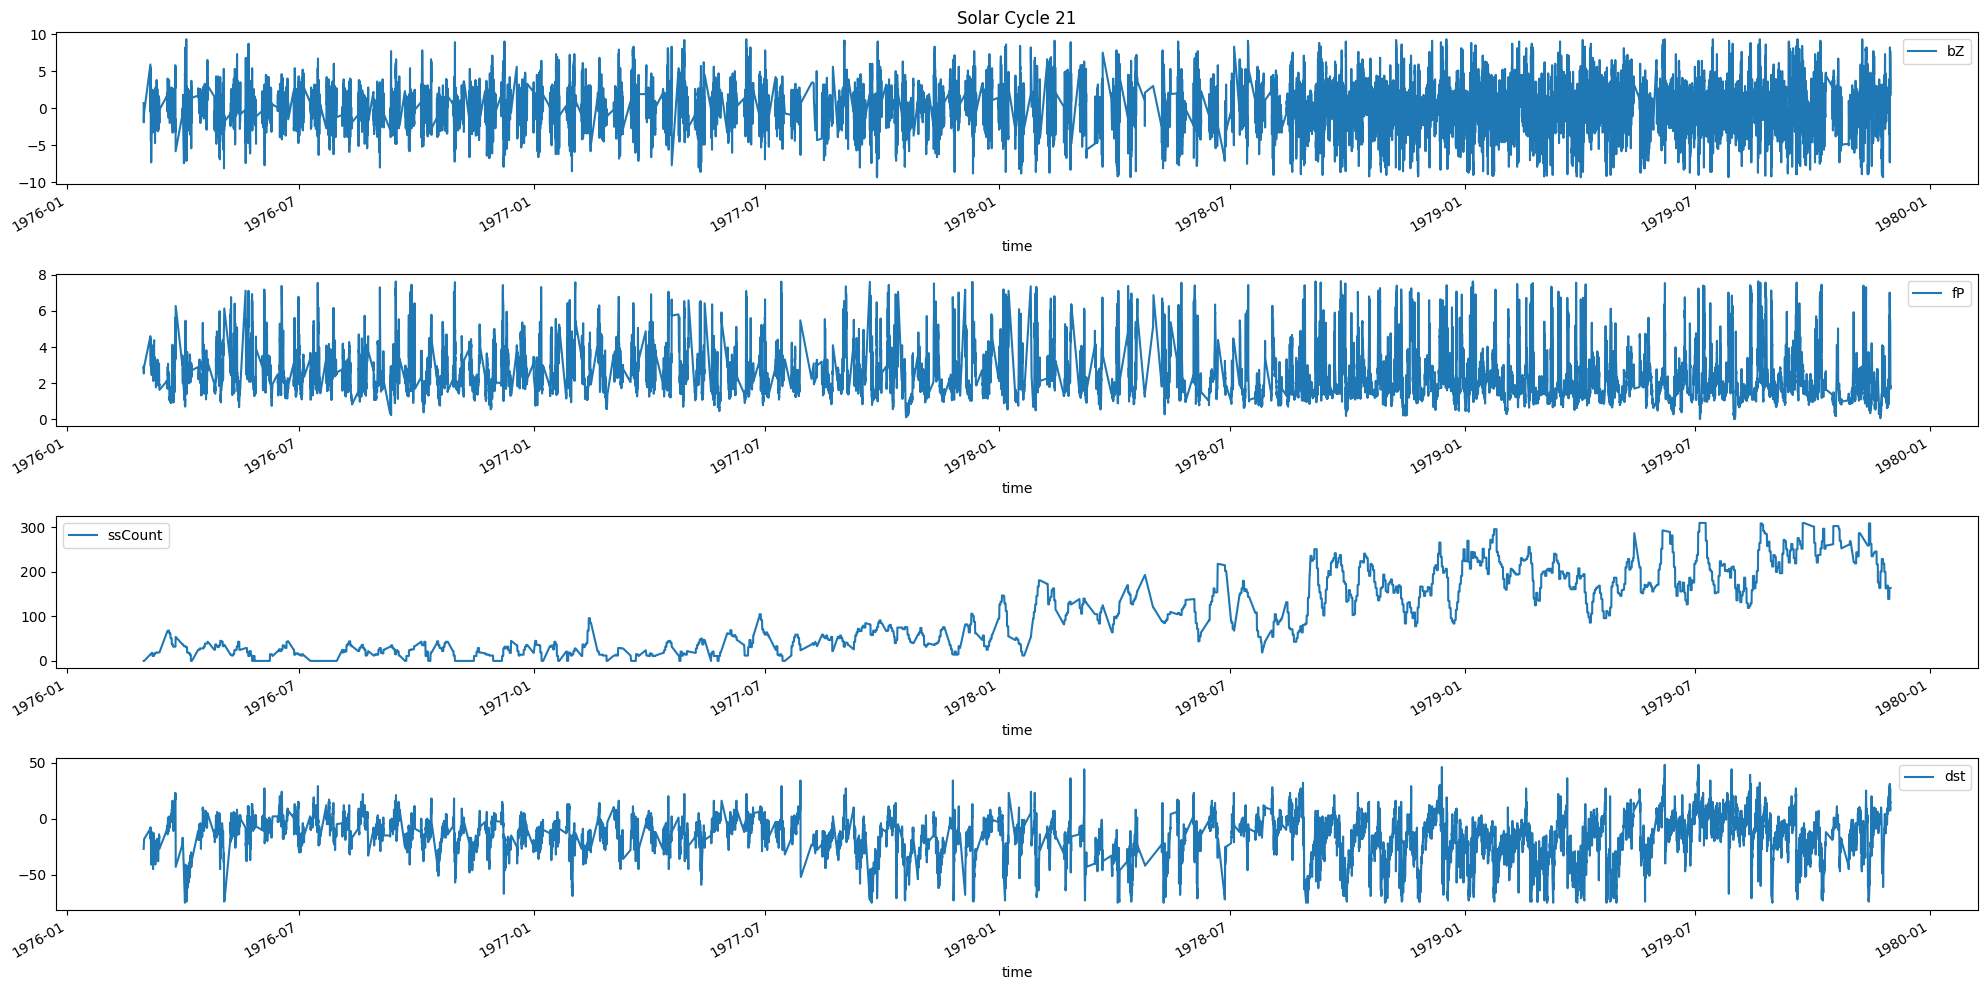

In [ ]:
# plot solar cycle 21
fig, ax = plt.subplots(4, 1, figsize=(20, 10))
bZFrame[bZFrame['cycle'] == 21].plot(x='time', y='bZ', ax=ax[0], title='Solar Cycle 21')
fPFrame[fPFrame['cycle'] == 21].plot(x='time', y='fP', ax=ax[1])
ssCountFrame[ssCountFrame['cycle'] == 21].plot(x='time', y='ssCount', ax=ax[2])
dstFrame[dstFrame['cycle'] == 21].plot(x='time', y='dst', ax=ax[3])
plt.tight_layout()
plt.show()

# plot solar cycle 22
fig, ax = plt.subplots(4, 1, figsize=(20, 10))
bZFrame[bZFrame['cycle'] == 22].plot(x='time', y='bZ', ax=ax[0], title='Solar Cycle 22')
fPFrame[fPFrame['cycle'] == 22].plot(x='time', y='fP', ax=ax[1])
ssCountFrame[ssCountFrame['cycle'] == 22].plot(x='time', y='ssCount', ax=ax[2])
dstFrame[dstFrame['cycle'] == 22].plot(x='time', y='dst', ax=ax[3])
plt.tight_layout()
plt.show()

# plot solar cycle 23
fig, ax = plt.subplots(4, 1, figsize=(20, 10))
bZFrame[bZFrame['cycle'] == 23].plot(x='time', y='bZ', ax=ax[0], title='Solar Cycle 23')
fPFrame[fPFrame['cycle'] == 23].plot(x='time', y='fP', ax=ax[1])
ssCountFrame[ssCountFrame['cycle'] == 23].plot(x='time', y='ssCount', ax=ax[2])
dstFrame[dstFrame['cycle'] == 23].plot(x='time', y='dst', ax=ax[3])
plt.tight_layout()
plt.show()

# plot solar cycle 24
fig, ax = plt.subplots(4, 1, figsize=(20, 10))
bZFrame[bZFrame['cycle'] == 24].plot(x='time', y='bZ', ax=ax[0], title='Solar Cycle 24')
fPFrame[fPFrame['cycle'] == 24].plot(x='time', y='fP', ax=ax[1])
ssCountFrame[ssCountFrame['cycle'] == 24].plot(x='time', y='ssCount', ax=ax[2])
dstFrame[dstFrame['cycle'] == 24].plot(x='time', y='dst', ax=ax[3])
plt.tight_layout()
plt.show()

# plot solar cycle 25
fig, ax = plt.subplots(4, 1, figsize=(20, 10))
bZFrame[bZFrame['cycle'] == 25].plot(x='time', y='bZ', ax=ax[0], title='Solar Cycle 25')
fPFrame[fPFrame['cycle'] == 25].plot(x='time', y='fP', ax=ax[1])
ssCountFrame[ssCountFrame['cycle'] == 25].plot(x='time', y='ssCount', ax=ax[2])
dstFrame[dstFrame['cycle'] == 25].plot(x='time', y='dst', ax=ax[3])
plt.tight_layout()
plt.show()

# run some analysis on the cycles
for i, cycle in enumerate(cycle_dfs):
    print(f'Cycle {i + 21}')
    reg.runBasicAnalysis(cycle_dfs)
    reg.runRegressionAnalysis(cycle_dfs)